# 2D 函数优化实例

## Himmelblau 函数

x, y range: (120,) (120,)
X, Y maps: (120, 120) (120, 120)


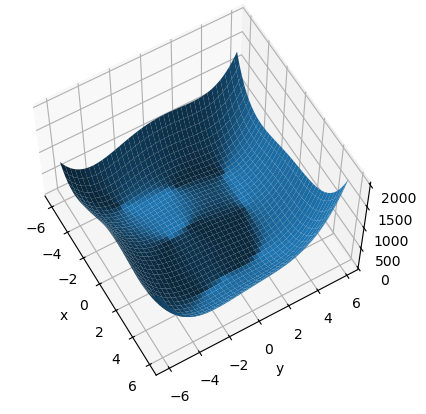

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11 ) ** 2 + (x[0] + x[1] ** 2 -7) ** 2

x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x, y range:', x.shape, y.shape)

# X, Y = np.meshgrid(x, y)：生成网格采样点矩阵
# 假设 x, y 分别为 m, n 维向量，则矩阵（数组）X, Y 的 dimension 都是： n×m
# 其中矩阵 X 中的行都为向量 x，矩阵 Y 的列都为向量 y
X, Y = np.meshgrid(x, y)
print('X, Y maps:', X.shape, Y.shape)

Z = himmelblau([X, Y])

fig = plt.figure('himmelblau')
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [17]:
import torch 
# 这里的 x 指的是一个坐标 x[0]表示坐标中的 x 值，x[1] 表示 y 值
x = torch.tensor([0, 0], dtype=torch.float, requires_grad=True)
# 第一个参数是列表，列表中存放所有需要进行优化的目标（即参数更新）
# 这一步就是建立一个更新公式：x'=x-lr·x_grad、y'=y-lr·y_grad（这里的x和y指的是坐标值）
optimizer = torch.optim.Adam([x], lr=1e-3) 
for step in range(20000):
    pred = himmelblau(x)
    # 防止梯度值叠加，每次都要置零
    optimizer.zero_grad()
    # 计算梯度，得到
    pred.backward()
    # 参数更新一次（即运算一次上面建立的更新公式）
    optimizer.step()

    if step % 2000 == 0:
        print(f'step {step}: x = {x.tolist()}, f(x) = {pred.item()}')

step 0: x = [0.0009999999310821295, 0.0009999999310821295], f(x) = 170.0
step 2000: x = [2.333181142807007, 1.9540694952011108], f(x) = 13.730901718139648
step 4000: x = [2.9820079803466797, 2.0270984172821045], f(x) = 0.014858869835734367
step 6000: x = [2.999983549118042, 2.0000221729278564], f(x) = 1.1074007488787174e-08
step 8000: x = [2.9999938011169434, 2.0000083446502686], f(x) = 1.5572823031106964e-09
step 10000: x = [2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step 12000: x = [2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step 14000: x = [2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step 16000: x = [3.0, 2.0], f(x) = 0.0
step 18000: x = [3.0, 2.0], f(x) = 0.0
